In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

In [4]:
! pip install PyMySQL

In [5]:
import pymysql.cursors

In [6]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [7]:
connection

In [8]:
cursor = connection.cursor()

In [9]:
cursor

In [10]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 카카오의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '035720'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2020-12-31'
"""  

In [11]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

494

In [12]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [13]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('102000.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('105000.000'),
  'L_PRC': Decimal('101500.000'),
  'O_PRC': Decimal('103500.000'),
  'STK_CD': '035720',
  'VOL': Decimal('173462.000')},
 {'C_PRC': Decimal('102500.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('105500.000'),
  'L_PRC': Decimal('100500.000'),
  'O_PRC': Decimal('102500.000'),
  'STK_CD': '035720',
  'VOL': Decimal('293989.000')},
 {'C_PRC': Decimal('103500.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('104000.000'),
  'L_PRC': Decimal('101500.000'),
  'O_PRC': Decimal('102000.000'),
  'STK_CD': '035720',
  'VOL': Decimal('251728.000')},
 {'C_PRC': Decimal('103000.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('107000.000'),
  'L_PRC': Decimal('102000.000'),
  'O_PRC': Decimal('105000.000'),
  'STK_CD': '035720',
  'VOL': Decimal('378153.000')},
 {'C_PRC': Decimal('99900.000'),
  'DT': datetime.date(2019, 1, 8),
  'H_PRC': Decimal('103000.0

In [14]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [15]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,035720,2019-01-02,102000.000,103500.000,105000.000,101500.000,173462.000
1,035720,2019-01-03,102500.000,102500.000,105500.000,100500.000,293989.000
2,035720,2019-01-04,103500.000,102000.000,104000.000,101500.000,251728.000
3,035720,2019-01-07,103000.000,105000.000,107000.000,102000.000,378153.000
4,035720,2019-01-08,99900.000,102500.000,103000.000,99500.000,450462.000
...,...,...,...,...,...,...,...
489,035720,2020-12-23,377500.000,381000.000,385500.000,377000.000,629952.000
490,035720,2020-12-24,374000.000,378500.000,380000.000,372000.000,465132.000
491,035720,2020-12-28,373000.000,374500.000,377000.000,369500.000,646464.000
492,035720,2020-12-29,384500.000,381000.000,385500.000,378000.000,857404.000


In [16]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  494 non-null    object
 1   DT      494 non-null    object
 2   C_PRC   494 non-null    object
 3   O_PRC   494 non-null    object
 4   H_PRC   494 non-null    object
 5   L_PRC   494 non-null    object
 6   VOL     494 non-null    object
dtypes: object(7)
memory usage: 27.1+ KB


In [17]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [18]:
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

In [19]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  494 non-null    object        
 1   DT      494 non-null    datetime64[ns]
 2   C_PRC   494 non-null    int64         
 3   O_PRC   494 non-null    int64         
 4   H_PRC   494 non-null    int64         
 5   L_PRC   494 non-null    int64         
 6   VOL     494 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 27.1+ KB


In [20]:
# 12일 지수이동평균을 구합니다.
short = 12
df["ema_short"] = df["C_PRC"].ewm(short).mean()

In [21]:
# 26일 지수이동평균을 구합니다.
long = 26
df["ema_long"] = df["C_PRC"].ewm(long).mean()

In [22]:
# 거래일 DT를 인덱스로 설정 합니다
df = df.set_index("DT")

In [23]:
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long
DT,,,,,,,,
2019-01-02,035720,102000,103500,105000,101500,173462,102000.000000,102000.000000
2019-01-03,035720,102500,102500,105500,100500,293989,102260.000000,102254.716981
2019-01-04,035720,103500,102000,104000,101500,251728,102706.823028,102685.571903
2019-01-07,035720,103000,105000,107000,102000,378153,102789.137380,102768.683274
2019-01-08,035720,99900,102500,103000,99500,450462,102115.317530,102150.844670
...,...,...,...,...,...,...,...,...
2020-12-23,035720,377500,381000,385500,377000,629952,371771.238128,367035.467006
2020-12-24,035720,374000,378500,380000,372000,465132,371942.681349,367293.412675
2020-12-28,035720,373000,374500,377000,369500,646464,372024.013553,367504.767763


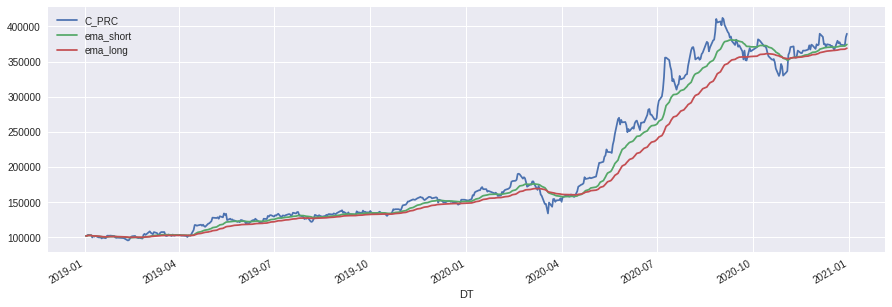

In [24]:
# "C_PRC", "ema_short" (12일 지수 이동평균), "ema_long"(26일 지수 이동 평균) 을 시각화 합니다.
df[["C_PRC", "ema_short", "ema_long"]].plot(figsize=(15, 5))

In [25]:
# MACD = 단기 지수이동평균(12일 지수 이동 평균) - 장기 지수이동평균 (26일 지수 이동 평균)
df["MACD"] = df["ema_short"] - df["ema_long"]

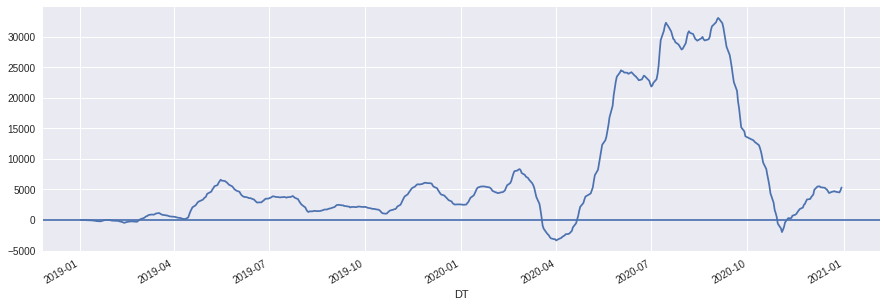

In [26]:
# MACD 값 시각화
df["MACD"].plot(figsize=(15, 5))
# 0 지점에 선을 그림
plt.axhline(0)

In [27]:
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df["MACD"].ewm(9).mean()

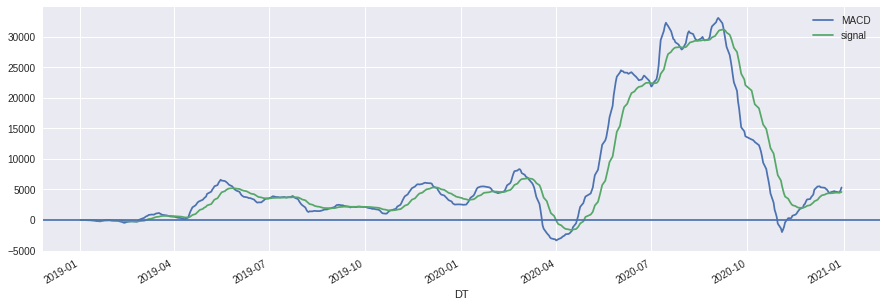

In [28]:
# MACD 와 9일 이동 평균 signal 시각화

# MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
# 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
df[["MACD", "signal"]].plot(figsize=(15, 5))

# 0에 선을 그림
plt.axhline(0)

In [29]:
# MACD oscillator 계산
df["macdhist"] = df["MACD"] - df["signal"]

<BarContainer object of 494 artists>

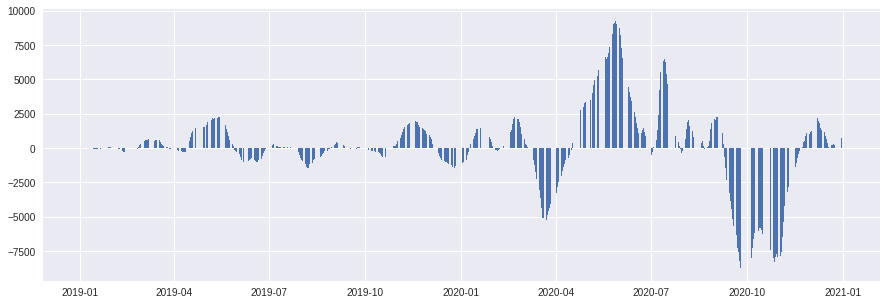

In [30]:
plt.figure(figsize=(15,5))
# MACD oscillator  시각화
plt.bar(df.index, df.macdhist)

In [31]:
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long,MACD,signal,macdhist
DT,,,,,,,,,,,
2019-01-02,035720,102000,103500,105000,101500,173462,102000.000000,102000.000000,0.000000,0.000000,0.000000
2019-01-03,035720,102500,102500,105500,100500,293989,102260.000000,102254.716981,5.283019,2.780536,2.502483
2019-01-04,035720,103500,102000,104000,101500,251728,102706.823028,102685.571903,21.251125,9.596251,11.654873
2019-01-07,035720,103000,105000,107000,102000,378153,102789.137380,102768.683274,20.454106,12.753522,7.700584
2019-01-08,035720,99900,102500,103000,99500,450462,102115.317530,102150.844670,-35.527141,0.963661,-36.490801
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,035720,377500,381000,385500,377000,629952,371771.238128,367035.467006,4735.771122,4456.030372,279.740751
2020-12-24,035720,374000,378500,380000,372000,465132,371942.681349,367293.412675,4649.268674,4475.354202,173.914473
2020-12-28,035720,373000,374500,377000,369500,646464,372024.013553,367504.767763,4519.245790,4479.743361,39.502430


In [32]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

     |████████████████████████████████| 21.8 MB 60.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [33]:
# plotly.express 로드하기
import plotly.express as px

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2019-01-02 to 2020-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STK_CD     494 non-null    object 
 1   C_PRC      494 non-null    int64  
 2   O_PRC      494 non-null    int64  
 3   H_PRC      494 non-null    int64  
 4   L_PRC      494 non-null    int64  
 5   VOL        494 non-null    int64  
 6   ema_short  494 non-null    float64
 7   ema_long   494 non-null    float64
 8   MACD       494 non-null    float64
 9   signal     494 non-null    float64
 10  macdhist   494 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 46.3+ KB


In [35]:
# 주식의 시가, 고개, 저가, 종가 시각화
px.line(df[["O_PRC","H_PRC","L_PRC","C_PRC"]], title="OHLC")

In [36]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title="MACD", height=500)

In [37]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df["macdhist"], height=300)

In [38]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots

In [39]:
# 시가 종가 저가 고가를 나타내는 봉차트
candlestick = go.Candlestick(x=df.index, 
                             open=df.O_PRC, 
                             high=df.H_PRC, 
                             low=df.L_PRC, 
                             close=df.C_PRC)

# MACD 선차트
macd = go.Scatter(x=df.index, y=df["MACD"], name="MACD")

# signal 선차트
signal = go.Scatter(x=df.index, y=df["signal"], name="signal")

# macdhist 막대 차트
oscillator = go.Bar(x=df.index, y=df["macdhist"], name="oscillator")

# 거래량 막대 차트
trade_volume = go.Bar(x=df.index, y=df["VOL"], name="거래량")


In [40]:
# make_subplots을 통해 4개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.

# 4줄 1칸의 그래프 생성
fig = subplots.make_subplots(rows=4, cols=1)

#1번째줄 1번째 칸에 봉차트
fig.append_trace(candlestick, 1, 1)

# 3번째줄 1번째 칸에 macd 차트
fig.append_trace(macd, 3, 1)

# 3번째줄 1번째 칸에 signal 차트
fig.append_trace(signal, 3, 1)

# 3번째줄 1번째 칸에 oscillator 차트
fig.append_trace(oscillator, 3, 1)


# 4번째줄 1번째 칸에 거래량 차트
fig.append_trace(trade_volume, 4, 1)
fig.show()